In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Business and Data Understanding

As talk on Airbnb kaggle data website, the following Airbnb activity is included in this Boston dataset: 
* Calendar, including listing id and the price and availability for that day
* Listings, including full descriptions and average review score 
* Reviews, including unique id for each reviewer and detailed comments 


Let us take a look on these three csv files.

#### Calendar

In [3]:
cdf = pd.read_csv('./boston-airbnb/calendar.csv')
cdf.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


It shows that the hosts are not avaible everyday and price may be changed at the busiest seasons. 

* What are the busiest seasons in Boston? 
* Which hosts are the most favorite？

#### Listings

In [4]:
ldf = pd.read_csv('./boston-airbnb/listings.csv')
ldf.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


Summary information on listing in Boston.It contains location, host information, cleaning and guest fees, amenities and so on.
We may find some import factors on price.

* What are the top factors strong relation to price?
* How to predict price？


#### Reviews

In [5]:
rdf = pd.read_csv('./boston-airbnb/reviews.csv')
rdf.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


We can find many interesting opinions,sush as 

* What are the most attractive facilities? It is big bed, large room or location?
* What will lead to bad impression？

### Data preparing

#### Clean Calendar

In [6]:
def clean_calendar(df):
    # Filter unavailable data.
    df = df[df['available'] == 't'].copy()
    
    # Remove "$," in price and convert to float
    df.loc[:,'price'] = df['price'].str.replace(',', '')
    df.loc[:,'price'] = df['price'].str.replace('$', '')
    df.loc[:,'price'] = df['price'].astype(float)
    
    # Set year/month
    df['year'] = df['date'].str[0:4]
    df['month'] = df['date'].str[5:7]
    
    return df
    

In [53]:
# clean data
cdf_clean = clean_calendar(cdf)

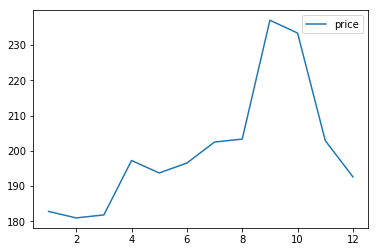

In [71]:
# get average price every month and plot
cdf_avg = cdf_clean.groupby(['month'], as_index=False)['price'].mean()

cdf_avg.index = cdf_avg.index+1
cdf_avg.plot()

* So we guess the busiest season is from August to November. You can get a lowest price if you go to Boston at February.

#### Clean Listings

In [97]:
#Only use quant variables and drop any rows with missing values
num_vars = ldf[['price','neighbourhood_cleansed','property_type','room_type','accommodates','bathrooms','bedrooms'
                ,'beds','bed_type','amenities','square_feet','availability_30'
                ,'availability_60','availability_90','availability_365'
                ,'reviews_per_month','number_of_reviews','require_guest_phone_verification','minimum_nights']]


#Drop the rows with missing price
drop_price_df = num_vars.dropna(subset=['price'], axis=0)

In [98]:
cols = drop_price_df.columns[drop_price_df.count()/drop_price_df.shape[0]>0.7]

cols

Index(['price', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'reviews_per_month', 'number_of_reviews',
       'require_guest_phone_verification', 'minimum_nights'],
      dtype='object')

In [99]:
drop_price_df = drop_price_df[cols]

In [101]:
drop_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 18 columns):
price                               3585 non-null object
neighbourhood_cleansed              3585 non-null object
property_type                       3582 non-null object
room_type                           3585 non-null object
accommodates                        3585 non-null int64
bathrooms                           3571 non-null float64
bedrooms                            3575 non-null float64
beds                                3576 non-null float64
bed_type                            3585 non-null object
amenities                           3585 non-null object
availability_30                     3585 non-null int64
availability_60                     3585 non-null int64
availability_90                     3585 non-null int64
availability_365                    3585 non-null int64
reviews_per_month                   2829 non-null float64
number_of_reviews                   358

In [73]:
def clean_listings(df):
    # Filter unavailable data.
    df = df[df['available'] == 't'].copy()
    
    # Remove "$," in price and convert to float
    df.loc[:,'price'] = df['price'].str.replace(',', '')
    df.loc[:,'price'] = df['price'].str.replace('$', '')
    df.loc[:,'price'] = df['price'].astype(float)
    
    # Set year/month
    df['year'] = df['date'].str[0:4]
    df['month'] = df['date'].str[5:7]
    
    return df
    

#### Clean Reviews

### Modeling and  evaluation

In [ ]:
from langdetect import detect
from textblob import TextBlob
import pandas as pd

df = pd.read_csv('reviews.csv')

for _, item in df.iterrows():
    k = str(item['listing_id']) + '\t' + str(item['id'])
    c = item['comments']
    try:
        if type(c) == str and detect(c) == 'en':
            bb = TextBlob(c)
            p = bb.sentiment.polarity
            if p < -0.1:
                print(k)
    except:
        print(k, c, 'Exception.')